# **🛠️ Preparación de los datos**

## **Extracción del archivo tratado**

Carga el archivo CSV que contiene los datos tratados anteriormente.

In [1]:
import pandas as pd

In [2]:
datos = pd.read_csv('../data/Datos_TelecomX.csv')

In [3]:
datos.head()

,Evasión,Género,Adulto Mayor,Tiene Pareja,Dependiente,Permanencia,Servicio Telefónico,Líneas Múltiples,Servicio Internet,Seguridad en Línea,...,Protección Dispositivo,Soporte Técnico,Streaming de TV,Streaming de Películas,Tipo Contrato,Facturación Electronica,Método de Pago,Cargo Mensual,Cargo Total,Cargo Diario
0,False,Femenino,False,True,True,9,True,False,DSL,False,...,False,True,True,False,Un año,True,Cheque por correo,65.6,593.30,2.186667
1,False,Masculino,False,False,False,9,True,True,DSL,False,...,False,False,False,True,Mes-a-Mes,False,Cheque por correo,59.9,542.40,1.996667
2,True,Masculino,False,False,False,4,True,False,Fibra óptica,False,...,True,False,False,False,Mes-a-Mes,True,Cheque electrónico,73.9,280.85,2.463333
3,True,Masculino,True,True,False,13,True,False,Fibra óptica,False,...,True,False,True,True,Mes-a-Mes,True,Cheque electrónico,98.0,1237.85,3.266667
4,True,Femenino,True,True,False,3,True,False,Fibra óptica,False,...,False,True,True,False,Mes-a-Mes,True,Cheque por correo,83.9,267.40,2.796667


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Evasión                  7267 non-null   bool   
 1   Género                   7267 non-null   object 
 2   Adulto Mayor             7267 non-null   bool   
 3   Tiene Pareja             7267 non-null   bool   
 4   Dependiente              7267 non-null   bool   
 5   Permanencia              7267 non-null   int64  
 6   Servicio Telefónico      7267 non-null   bool   
 7   Líneas Múltiples         7267 non-null   bool   
 8   Servicio Internet        7267 non-null   object 
 9   Seguridad en Línea       7267 non-null   bool   
 10  Respaldo en Linea        7267 non-null   bool   
 11  Protección Dispositivo   7267 non-null   bool   
 12  Soporte Técnico          7267 non-null   bool   
 13  Streaming de TV          7267 non-null   bool   
 14  Streaming de Películas  

Observo que la columna 'Cargo Diario' es una derivación directa de 'Cargo Mensual' (Cargo Mensual / 30). Además, 'Cargo Total' es probablemente el resultado de multiplicar 'Cargo Mensual' por la 'Permanencia' del cliente. Estas columnas son redundantes y pueden introducir ruido y multicolinealidad en el modelo. Por lo tanto, propongo eliminar las columnas 'Cargo Total' y 'Cargo Diario'.

In [5]:
datos.drop(columns=['Cargo Total', 'Cargo Diario'], axis=0, inplace=True)

In [6]:
datos.head(2)

,Evasión,Género,Adulto Mayor,Tiene Pareja,Dependiente,Permanencia,Servicio Telefónico,Líneas Múltiples,Servicio Internet,Seguridad en Línea,Respaldo en Linea,Protección Dispositivo,Soporte Técnico,Streaming de TV,Streaming de Películas,Tipo Contrato,Facturación Electronica,Método de Pago,Cargo Mensual
0,False,Femenino,False,True,True,9,True,False,DSL,False,True,False,True,True,False,Un año,True,Cheque por correo,65.6
1,False,Masculino,False,False,False,9,True,True,DSL,False,False,False,False,False,True,Mes-a-Mes,False,Cheque por correo,59.9


# **Transformación de variables categóricas a numéricas**

Para que los algoritmos de **machine learning** puedan procesar los datos, necesitamos convertir todas las variables categóricas (aquellas que representan categorías o etiquetas, como 'Género' o 'Tipo Contrato') en un formato numérico.

Utilizaremos una técnica común llamada *One-Hot Encoding*. Este método crea nuevas columnas binarias (con valores de 0 o 1) para cada categoría presente en las columnas de tipo object. La función `get_dummies()` de pandas es ideal para esta tarea. 

Adicionalmente, convertiremos las columnas booleanas (True/False) a su representación numérica (1/0).

In [7]:
# Identificar columnas categóricas (object) y booleanas
col_categoricas = datos.select_dtypes(include=['object']).columns
col_booleanas = datos.select_dtypes(include=['bool']).columns

# Convertir columnas booleanas a 0 y 1
for col in col_booleanas:
    datos[col] = datos[col].astype(int)

# Aplicar One-Hot Encoding a las columnas categóricas
datos = pd.get_dummies(datos, columns=col_categoricas, drop_first=True)
    

datos.head()

,Evasión,Adulto Mayor,Tiene Pareja,Dependiente,Permanencia,Servicio Telefónico,Líneas Múltiples,Seguridad en Línea,Respaldo en Linea,Protección Dispositivo,...,Facturación Electronica,Cargo Mensual,Género_Masculino,Servicio Internet_Fibra óptica,Servicio Internet_No,Tipo Contrato_Mes-a-Mes,Tipo Contrato_Un año,Método de Pago_Cheque por correo,Método de Pago_Tarjeta de crédito,Método de Pago_Transferencia
0,0,0,1,1,9,1,0,0,1,0,...,1,65.6,False,False,False,False,True,True,False,False
1,0,0,0,0,9,1,1,0,0,0,...,0,59.9,True,False,False,True,False,True,False,False
2,1,0,0,0,4,1,0,0,0,1,...,1,73.9,True,True,False,True,False,False,False,False
3,1,1,1,0,13,1,0,0,1,1,...,1,98.0,True,True,False,True,False,False,False,False
4,1,1,1,0,3,1,0,0,0,0,...,1,83.9,False,True,False,True,False,True,False,False


# **Análisis del desbalance de clases**

Un paso crucial antes de entrenar un modelo es verificar la distribución de la variable objetivo, en este caso, la columna Evasión. Si una de las clases (clientes que cancelan vs. los que no) es significativamente más pequeña que la otra, el modelo podría tener dificultades para aprender a predecir la clase minoritaria.

A continuación, calculamos la proporción de cada clase y la visualizamos para determinar si existe un desbalance significativo.

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la proporción de la variable objetivo 'Evasión'
proporcion_evasion = datos['Evasión'].value_counts(normalize=True) * 100

print("Proporción de Clientes por Clase (0 = No, 1 = Sí):")
print(proporcion_evasion)

Proporción de Clientes por Clase (0 = No, 1 = Sí):
Evasión
0    74.280996
1    25.719004
Name: proportion, dtype: float64


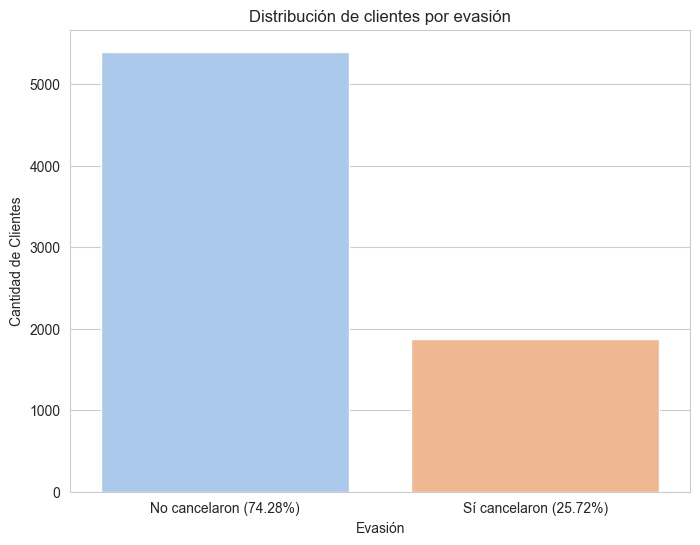

In [32]:
# Visualizar la distribución de la variable 'Evasión'
plt.figure(figsize=(8, 6))
sns.countplot(x='Evasión', data=datos, palette='pastel', hue='Evasión', legend=False)
plt.title('Distribución de clientes por evasión')
plt.ylabel('Cantidad de Clientes')
plt.xticks([0, 1], [f'No cancelaron ({proporcion_evasion[0]:.2f}%)', f'Sí cancelaron ({proporcion_evasion[1]:.2f}%)'])
plt.show()

El gráfico nos muestra que un 74.3% de clientes no cancelan y un 25.7% sí lo hacen, por lo que tenemos un desbalance de clases significativo.

Esto es un problema porque un modelo de *machine learning* entrenado con estos datos tenderá a "apostar" por la clase mayoritaria (no cancelación) para parecer más preciso, pero fallará en identificar correctamente a los clientes que sí van a cancelar, que es nuestro objetivo principal.

Para solucionar esto, aplicaremos una técnica de sobremuestreo llamada SMOTE (*Synthetic Minority Over-sampling Technique*). SMOTE creará nuevos ejemplos sintéticos de la clase minoritaria (clientes que cancelan) para igualar la proporción con la clase mayoritaria.

# **Balanceo de clases con SMOTE**

Dado que el conjunto de datos está desbalanceado (la clase "No Evasión" es mayoritaria), aplicaremos la técnica de sobremuestreo **SMOTE** para equilibrar las clases. Esto es fundamental para evitar que nuestro modelo predictivo esté sesgado hacia la clase mayoritaria y para mejorar su capacidad de identificar a los clientes que probablemente cancelarán el servicio.

**SMOTE** funciona creando nuevos ejemplos sintéticos de la clase minoritaria en lugar de simplemente duplicar los existentes.

In [9]:
from imblearn.over_sampling import SMOTE

# Separar las características (X) de la variable objetivo (y)
X = datos.drop('Evasión', axis=1)
y = datos['Evasión']

# Inicializar y aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Crear un nuevo DataFrame balanceado
datos_balanceados = pd.DataFrame(X_resampled, columns=X.columns)
datos_balanceados['Evasión'] = y_resampled

# Verificar la nueva proporción de clases
print("Proporción de Clases Después de SMOTE:")
print(datos_balanceados['Evasión'].value_counts(normalize=True) * 100)

Proporción de Clases Después de SMOTE:
Evasión
0    50.0
1    50.0
Name: proportion, dtype: float64


# **Estandarización de las características numéricas**

## **¿Por qué es necesario?**

Muchos algoritmos de machine learning, como la Regresión Logística, las Máquinas de Soporte Vectorial (SVM) o K-Vecinos más Cercanos (KNN), son sensibles a la escala de las características. Estos modelos calculan distancias o pesos que pueden ser dominados por las variables que tienen rangos numéricos más
grandes.

En nuestro caso, la columna `Cargo Mensual` (valores de ~20 a ~120) tiene una escala muy diferente a `Permanencia` (1 a 72) o a las columnas binarias (0 o 1). Sin un ajuste, el modelo podría dar una importancia indebida al `Cargo Mensual` simplemente por su magnitud, y no por su poder predictivo real.

Los modelos basados en árboles de decisión (como Random Forest o Gradient Boosting) no son sensibles a la escala de las características, pero aplicar la estandarización no los perjudica y nos permite comparar de manera justa el rendimiento entre todos los tipos de modelos.

## **¿Qué técnica usar: Normalización o Estandarización?**

- **Normalización (MinMaxScaler):** Escala los datos a un rango fijo, generalmente [0, 1]. Es útil, pero muy sensible a los valores atípicos (outliers).
- **Estandarización (StandardScaler):** Transforma los datos para que tengan una media de 0 y una desviación estándar de 1. Es menos sensible a los outliers y es la técnica más comúnmente utilizada en _machine learning_.

Para este proyecto, la **Estandarización** (_StandardScaler_) es la opción más segura y recomendada.

> _**Importante:** La estandarización debe realizarse después de dividir los datos en conjuntos de entrenamiento y prueba. El escalador se "ajusta" (fit) únicamente con los datos de entrenamiento para aprender la media y la desviación estándar de ese conjunto. Luego, esa misma transformación se aplica tanto a los datos de entrenamiento como a los de prueba para evitar la fuga de información del conjunto de prueba al de entrenamiento._

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Dividir los datos en conjuntos de entrenamiento y prueba
# Usaremos el DataFrame balanceado con SMOTE
X = datos_balanceados.drop('Evasión', axis=1)
y = datos_balanceados['Evasión']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [11]:
# 2. Identificar las columnas numéricas que necesitan ser estandarizadas
# En nuestro caso, son 'Permanencia' y 'Cargo Mensual'. Las demás son binarias (0/1).
columnas_a_escalar = ['Permanencia', 'Cargo Mensual']

In [12]:
# 3. Inicializar y ajustar el escalador SOLO con los datos de entrenamiento
scaler = StandardScaler()
scaler.fit(X_train[columnas_a_escalar])

StandardScaler()

In [13]:
# 4. Aplicar la transformación a los conjuntos de entrenamiento y prueba
X_train[columnas_a_escalar] = scaler.transform(X_train[columnas_a_escalar])
X_test[columnas_a_escalar] = scaler.transform(X_test[columnas_a_escalar])

In [14]:
 # 5. Primeras filas del conjunto de entrenamiento estandarizado
X_train.head()

,Adulto Mayor,Tiene Pareja,Dependiente,Permanencia,Servicio Telefónico,Líneas Múltiples,Seguridad en Línea,Respaldo en Linea,Protección Dispositivo,Soporte Técnico,...,Facturación Electronica,Cargo Mensual,Género_Masculino,Servicio Internet_Fibra óptica,Servicio Internet_No,Tipo Contrato_Mes-a-Mes,Tipo Contrato_Un año,Método de Pago_Cheque por correo,Método de Pago_Tarjeta de crédito,Método de Pago_Transferencia
9991,0,1,1,-0.401764,1,0,0,0,0,1,...,0,1.095505,True,True,False,False,True,False,False,True
10501,0,0,0,-0.527007,1,0,0,0,0,0,...,0,0.622580,False,True,False,True,False,False,False,False
1532,1,1,1,1.685614,0,0,0,1,1,0,...,1,-0.515848,False,False,False,False,False,False,False,False
7862,0,0,0,-0.860988,1,0,0,1,1,1,...,1,1.455840,True,True,False,True,False,False,True,False
3663,0,0,0,-1.111473,1,0,0,0,0,0,...,0,-1.636868,True,False,True,True,False,True,False,False


# **Análisis de correlación entre variables**

Para entender cómo se relacionan las variables entre sí, generaremos una matriz de correlación. Esta matriz nos muestra el coeficiente de correlación de Pearson entre cada par de variables, que varía de -1 a +1:

- +1: Correlación positiva perfecta.
- 0: Sin correlación lineal.
- -1: Correlación negativa perfecta.

Prestaremos especial atención a la fila o columna de Evasión para identificar qué variables tienen una mayor influencia (positiva o negativa) en la cancelación de servicios. Un color más intenso (rojo para positivo, azul para negativo) indica una correlación más fuerte.

Además, para facilitar la interpretación, crearemos un gráfico de barras que ordena las variables según su correlación con la **Evasión**.

## **Matriz de correlación completa**

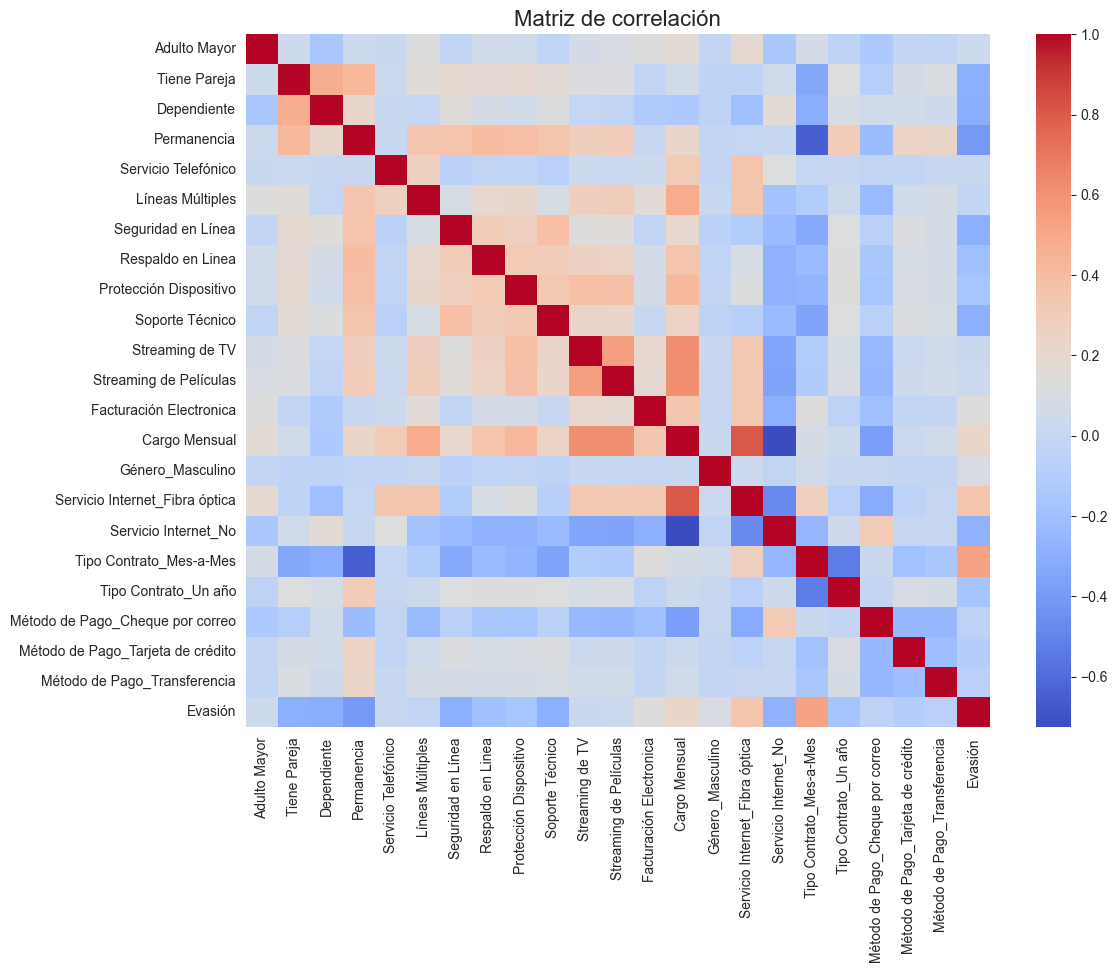

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de correlación usando el dataframe balanceado
corr_matrix = datos_balanceados.corr()

# Configurar el tamaño de la figura para asegurar que sea legible
plt.figure(figsize=(12, 9))

# Crear el mapa de calor (heatmap)
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False) # annot=False para no saturar el gráfico
plt.title('Matriz de correlación', fontsize=16)
plt.show()

## **Gráfico de correlación con la variable 'Evasión'**

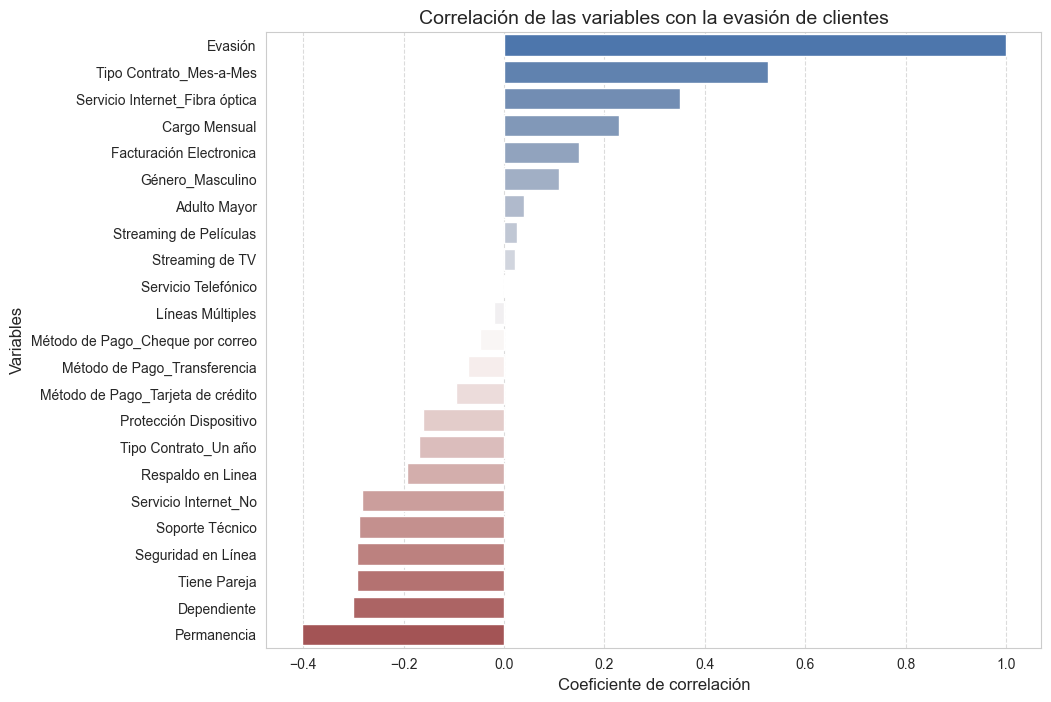

In [39]:
# Calcular la correlación de todas las variables con 'Evasión' y ordenarlas
correlacion_evasion = datos_balanceados.corr()['Evasión'].sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 8))
sns.barplot(x=correlacion_evasion.values, y=correlacion_evasion.index, hue=correlacion_evasion.index, palette='vlag')
plt.title('Correlación de las variables con la evasión de clientes', fontsize=14)
plt.xlabel('Coeficiente de correlación', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## **Análisis del resultado:**

El segundo gráfico es el más importante para nuestro objetivo. Las variables en la parte superior (con las barras más largas hacia la derecha) son las que tienen una correlación positiva más fuerte con la cancelación. Por ejemplo, un `Tipo Contrato_Mes-a-Mes` alto probablemente se correlacione con una mayor `Evasión`.

Por otro lado, las variables en la parte inferior (con las barras más largas hacia la izquierda) tienen la correlación negativa más fuerte. Por ejemplo, una `Permanencia` alta se correlaciona con una menor `Evasión`, lo cual es lógico.

Estas variables con las correlaciones más fuertes (tanto positivas como negativas) serán probablemente las más importantes para nuestro modelo predictivo.

# **Análisis visual de variables clave vs. evasión**

Ahora que sabemos qué variables están más correlacionadas con la cancelación, vamos a visualizar esas relaciones para entender cómo impactan en el comportamiento del cliente.

## **1. Variables numéricas: `Permanencia` y `Cargo Mensual`**

Utilizaremos boxplots para comparar la distribución de estas variables para los clientes que cancelaron (Evasión = 1) frente a los que no (Evasión = 0).

- **Permanencia:** Intuitivamente, esperaríamos que los clientes que cancelan tengan una permanencia menor.
- **Cargo Mensual:** La relación aquí puede ser más compleja. ¿Los clientes con cargos más altos o más bajos son más propensos a irse?

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para los gráficos
sns.set_style(style="whitegrid")

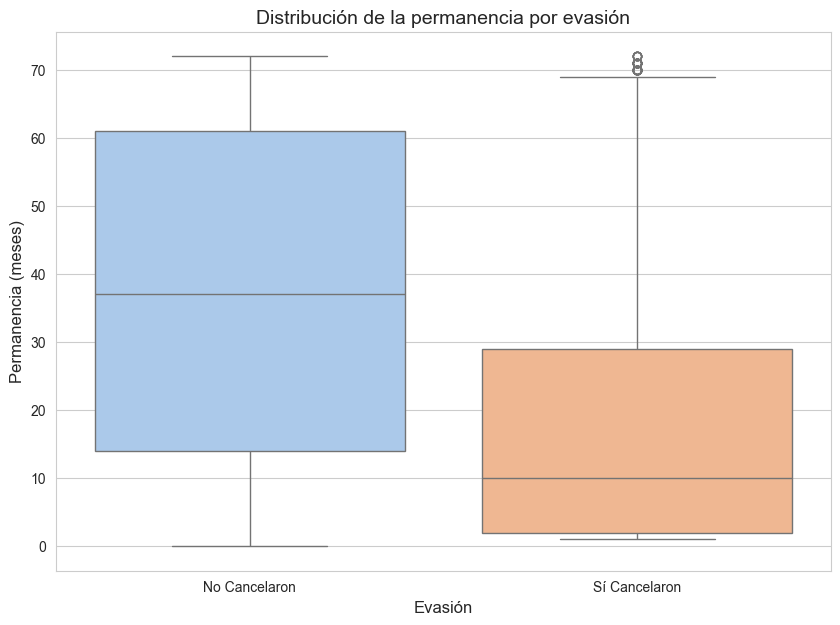

In [18]:
# Boxplot para Permanencia vs. Evasión 
plt.figure(figsize=(10, 7))
sns.boxplot(x='Evasión', y='Permanencia', data=datos_balanceados, palette='pastel', hue=y, legend=False)
plt.title('Distribución de la permanencia por evasión', fontsize=14)
plt.xlabel('Evasión', fontsize=12)
plt.ylabel('Permanencia (meses)', fontsize=12)
plt.xticks([0, 1], ['No Cancelaron', 'Sí Cancelaron'])
plt.show()

En el gráfico de Permanencia, se observa la diferencia en la mediana (la línea dentro de la caja) y la dispersión general. La caja para "Sí Cancelaron" esta mucho más abajo, confirmando que los clientes con menor antigüedad son los que más cancelan.

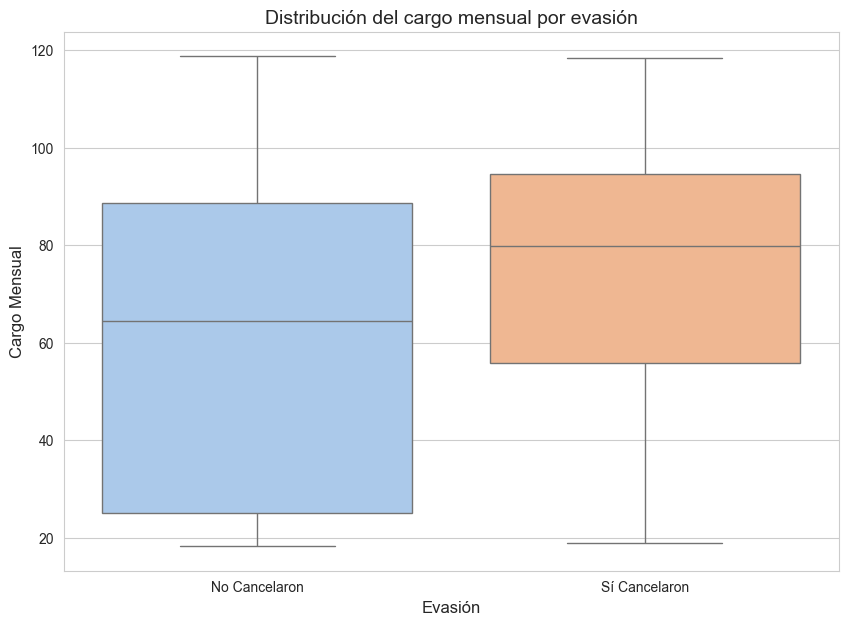

In [19]:
# Boxplot para Cargo Mensual vs. Evasión 
plt.figure(figsize=(10, 7))
sns.boxplot(x='Evasión', y='Cargo Mensual', data=datos_balanceados, palette='pastel', hue=y, legend=False)
plt.title('Distribución del cargo mensual por evasión', fontsize=14)
plt.xlabel('Evasión', fontsize=12)
plt.ylabel('Cargo Mensual', fontsize=12)
plt.xticks([0, 1], ['No Cancelaron', 'Sí Cancelaron'])
plt.show()

Para el Cargo Mensual, el boxplot revela que los clientes que cancelan tienden a pagar más

## **2. Variables categóricas: Tipo de Contrato y Servicios de Internet**

Aquí, usaremos gráficos de conteo para ver cuántos clientes cancelan o permanecen según la categoría. Nos centraremos en las variables que la matriz de correlación señaló como importantes.

- **Tipo de Contrato (Mes a Mes):** La correlación sugiere que este tipo de contrato es un fuerte predictor de la cancelación.
- **Servicio de Internet (Fibra Óptica):** ¿Tener fibra óptica influye en la decisión de cancelar?

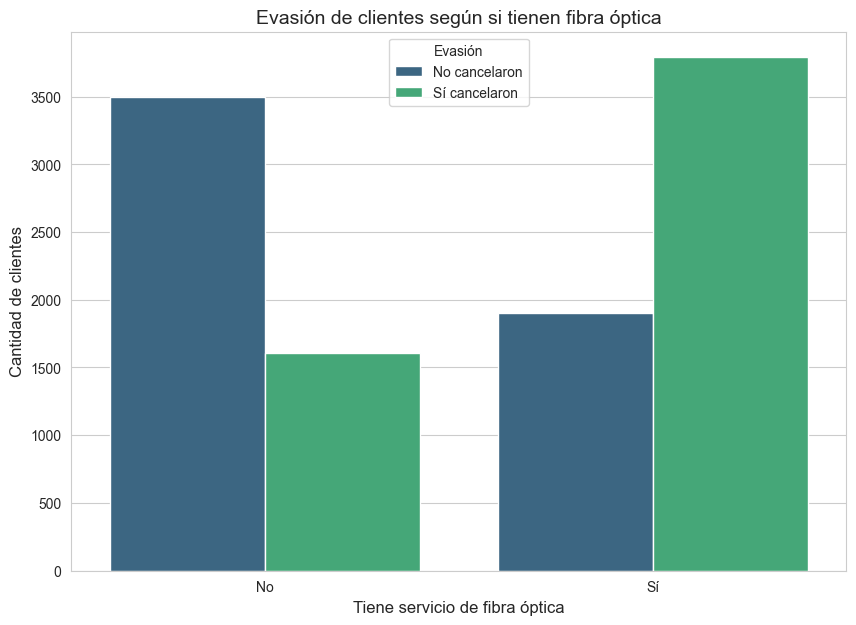

In [ ]:
# Gráfico de conteo para Tipo de Contrato (Mes a Mes)
plt.figure(figsize=(10, 7))
sns.countplot(x='Servicio Internet_Fibra óptica', hue='Evasión', data=datos_balanceados, palette='viridis')
plt.title('Evasión de clientes según si tienen fibra óptica', fontsize=14)
plt.xlabel('Tiene servicio de fibra óptica', fontsize=12)
plt.xticks([0, 1], ['No', 'Sí'])
plt.ylabel('Cantidad de clientes', fontsize=12)
legend_labels = ['No cancelaron', 'Sí cancelaron']
plt.legend(title='Evasión', labels=legend_labels)
plt.show()

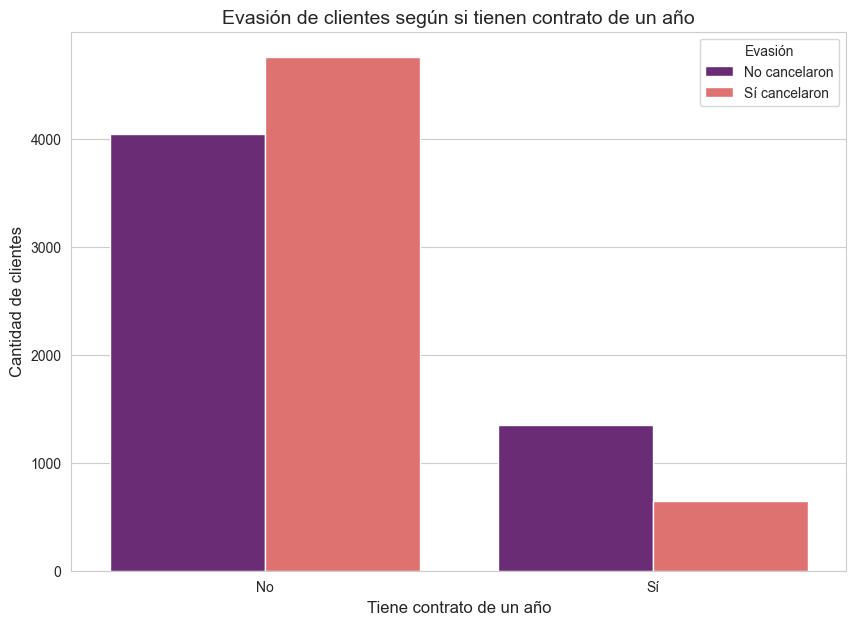

In [21]:
# Gráfico de conteo para el Tipo de Contrato
plt.figure(figsize=(10, 7))
sns.countplot(x='Tipo Contrato_Un año', hue='Evasión', data=datos_balanceados, palette='magma')
plt.title('Evasión de clientes según si tienen contrato de un año', fontsize=14)
plt.xlabel('Tiene contrato de un año', fontsize=12)
plt.xticks([0, 1], ['No', 'Sí'])
plt.ylabel('Cantidad de clientes', fontsize=12)
plt.legend(title='Evasión', labels=legend_labels)
plt.show()

## **Interpretación de los hallazgos clave**

El análisis revela dos perfiles de clientes muy claros y potentes.

**Contratos a largo plazo:** La gran mayoría de las cancelaciones (más de 5,000) provienen de clientes que no tienen un contrato de un año. Por el contrario, los clientes que sí tienen un contrato de un año son abrumadoramente leales (solo una pequeña fracción de ellos cancela).

- **Lo que significa:** El tipo de contrato es, posiblemente, el predictor más fuerte de la lealtad del cliente. Un cliente en un contrato de "Mes a Mes" no tiene barreras para irse. En cambio, un cliente que se compromete a un contrato de uno o dos años ya ha demostrado un nivel de compromiso que lo hace mucho menos propenso a cancelar.
- **Implicación para el negocio:** Una estrategia de retención obvia sería crear incentivos para que los clientes de "Mes a Mes" se cambien a contratos a plazo, incluso con un pequeño descuento.

**La paradoja de la Fibra Óptica (El servicio premium de riesgo):** Contrario a lo que se podría esperar de un servicio teóricamente superior, los clientes con Fibra Óptica cancelan en una proporción mucho mayor que los que no la tienen.

- **Lo que significa:** Esto sugiere una de varias posibilidades, o una combinación de ellas:
    - **Precio:** La fibra óptica suele tener un Cargo Mensual más alto. Es probable que los clientes se sientan atraídos por la velocidad, pero luego consideren que el costo es demasiado elevado y cancelen. Esto se alinea con lo que probablemente vimos en el boxplot de Cargo Mensual: los clientes que cancelan tienden a tener un cargo mensual más alto.
    - **Inestabilidad del Servicio:** El servicio de fibra óptica de esta compañía podría tener problemas de fiabilidad o micro-cortes que no se reflejan en las variables, generando frustración y cancelación.
    - **Perfil del Cliente:** La fibra óptica puede atraer a un tipo de cliente más exigente y menos leal (early adopters) que está dispuesto a cambiar de proveedor en busca de la mejor oferta o tecnología.
- **Implicación para el Negocio:** La compañía necesita investigar urgentemente por qué su producto premium está tan correlacionado con la cancelación. ¿Es el precio? ¿La calidad del servicio? ¿La atención al cliente para este segmento?


## **Conclusión del análisis exploratorio**

Basado en las observaciones, podemos definir dos perfiles claros:
- **Perfil de alto riesgo de cancelación:** Un cliente con contrato **Mes a Mes**, que tiene servicio de **Fibra Óptica** y, probablemente, una **Permanencia** baja y un **Cargo Mensual** alto.
- **Perfil de cliente leal:** Un cliente con un **contrato de uno o dos años**, que probablemente **no tiene Fibra Óptica** (quizás tiene DSL o no tiene internet) y que ha acumulado una **Permanencia** significativa.